In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
nvda_sentiment = pd.read_csv('nvda.csv')
nvda_sentiment = nvda_sentiment.drop(['source', 'link', 'Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [3]:
nvda_sentiment['datetime'] = pd.to_datetime(nvda_sentiment['datetime']).dt.date
nvda_sentiment

/var/folders/s2/04l93vjs1sd427p8mgfj27fh0000gn/T/ipykernel_59872/1855278195.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nvda_sentiment['datetime'] = pd.to_datetime(nvda_sentiment['datetime']).dt.date


,title,datetime,sentiment_label,sentiment_score
0,"5 Top Stock Trades for Tuesday: NVDA, TSLA, GILD",2019-11-25,Neutral,0.999999
1,Stock Market Today: Merger Monday; Tesla’s Cyb...,2019-11-25,Neutral,0.999994
2,10 Fantastic Tech Gifts to Buy for $500 and Up,2019-11-26,Positive,0.985829
3,"Shares Could Go Higher, but Nvidia Stock Is Ov...",2019-11-26,Negative,0.991712
4,"Tuesday’s Vital Data: Nvidia, Bank of America ...",2019-11-26,Neutral,0.999958
...,...,...,...,...
8944,Quantum announces support for ‘NVIDIA GPUDirec...,2024-12-18,Positive,0.998504
8945,"4 stocks to watch on Wednesday: GIS, MU and more",2024-12-18,Neutral,0.999953
8946,Notable open interest changes for December 18th,2024-12-18,Neutral,0.999996
8947,Early notable gainers among liquid option name...,2024-12-18,Positive,0.940363


In [4]:
aggregated = nvda_sentiment.groupby('datetime').agg({
    'sentiment_label' : lambda x : x.mode()[0],
    'sentiment_score' : 'mean'
}).reset_index()

aggregated = aggregated.sort_values(by='datetime')
aggregated.to_csv('nvda_sentiment_aggregated.csv', index = False)

In [5]:
nvda_sentiment_aggregated = pd.read_csv('nvda_sentiment_aggregated.csv')
nvda_sentiment_aggregated.value_counts('sentiment_label')
nvda_sentiment_aggregated.rename(columns={'datetime': 'date'}, inplace=True)
nvda_sentiment_aggregated

,date,sentiment_label,sentiment_score
0,2019-11-25,Neutral,0.999997
1,2019-11-26,Neutral,0.995080
2,2019-11-27,Positive,1.000000
3,2019-12-02,Positive,0.988258
4,2019-12-03,Positive,0.999859
...,...,...,...
1468,2024-12-13,Neutral,0.986678
1469,2024-12-15,Positive,1.000000
1470,2024-12-16,Neutral,0.964409
1471,2024-12-17,Neutral,0.976879


In [6]:
nvda = yf.Ticker("NVDA")
nvda = nvda.history(period="max")

del nvda['Dividends']
del nvda['Stock Splits']

nvda.index = pd.to_datetime(nvda.index)
nvda.index = nvda.index.date
nvda

,Open,High,Low,Close,Volume
1999-01-22,0.040122,0.044779,0.035585,0.037615,2714688000
1999-01-25,0.040600,0.042033,0.037615,0.041556,510480000
1999-01-26,0.042033,0.042869,0.037734,0.038331,343200000
1999-01-27,0.038451,0.039406,0.036301,0.038212,244368000
1999-01-28,0.038212,0.038451,0.037854,0.038092,227520000
...,...,...,...,...,...
2024-12-27,138.550003,139.020004,134.710007,137.009995,170582600
2024-12-30,134.830002,140.270004,134.020004,137.490005,167734700
2024-12-31,138.029999,138.070007,133.830002,134.289993,155659200
2025-01-02,136.000000,138.880005,134.630005,138.309998,198247200


In [7]:
nvda_sentiment_aggregated.set_index('date', inplace=True)
nvda_sentiment_aggregated

,sentiment_label,sentiment_score
date,,
2019-11-25,Neutral,0.999997
2019-11-26,Neutral,0.995080
2019-11-27,Positive,1.000000
2019-12-02,Positive,0.988258
2019-12-03,Positive,0.999859
...,...,...
2024-12-13,Neutral,0.986678
2024-12-15,Positive,1.000000
2024-12-16,Neutral,0.964409


In [8]:
nvda.index = pd.to_datetime(nvda.index)
nvda_sentiment_aggregated.index = pd.to_datetime(nvda_sentiment_aggregated.index)

new_nvda = nvda.join(nvda_sentiment_aggregated, how = "inner")
new_nvda

,Open,High,Low,Close,Volume,sentiment_label,sentiment_score
2019-11-25,5.374486,5.508077,5.361550,5.503102,506476000,Neutral,0.999997
2019-11-26,5.485439,5.490166,5.391901,5.398369,385244000,Neutral,0.995080
2019-11-27,5.443928,5.478283,5.406833,5.433222,215784000,Positive,1.000000
2019-12-02,5.388909,5.402353,5.194225,5.209411,372036000,Positive,0.988258
2019-12-03,5.025681,5.173810,4.988338,5.169827,465232000,Positive,0.999859
...,...,...,...,...,...,...,...
2024-12-12,137.080002,138.440002,135.800003,137.339996,159211400,Neutral,0.999864
2024-12-13,138.940002,139.600006,132.539993,134.250000,231514900,Neutral,0.986678
2024-12-16,134.179993,134.399994,130.419998,132.000000,237951100,Neutral,0.964409
2024-12-17,129.089996,131.589996,126.860001,130.389999,259410300,Neutral,0.976879


In [9]:
new_nvda['Tomorrow'] = new_nvda['Close'].shift(-1)
new_nvda

,Open,High,Low,Close,Volume,sentiment_label,sentiment_score,Tomorrow
2019-11-25,5.374486,5.508077,5.361550,5.503102,506476000,Neutral,0.999997,5.398369
2019-11-26,5.485439,5.490166,5.391901,5.398369,385244000,Neutral,0.995080,5.433222
2019-11-27,5.443928,5.478283,5.406833,5.433222,215784000,Positive,1.000000,5.209411
2019-12-02,5.388909,5.402353,5.194225,5.209411,372036000,Positive,0.988258,5.169827
2019-12-03,5.025681,5.173810,4.988338,5.169827,465232000,Positive,0.999859,5.213641
...,...,...,...,...,...,...,...,...
2024-12-12,137.080002,138.440002,135.800003,137.339996,159211400,Neutral,0.999864,134.250000
2024-12-13,138.940002,139.600006,132.539993,134.250000,231514900,Neutral,0.986678,132.000000
2024-12-16,134.179993,134.399994,130.419998,132.000000,237951100,Neutral,0.964409,130.389999
2024-12-17,129.089996,131.589996,126.860001,130.389999,259410300,Neutral,0.976879,128.910004


In [10]:
new_nvda['Target'] = (new_nvda['Tomorrow'] > new_nvda['Close']).astype(int)
new_nvda

,Open,High,Low,Close,Volume,sentiment_label,sentiment_score,Tomorrow,Target
2019-11-25,5.374486,5.508077,5.361550,5.503102,506476000,Neutral,0.999997,5.398369,0
2019-11-26,5.485439,5.490166,5.391901,5.398369,385244000,Neutral,0.995080,5.433222,1
2019-11-27,5.443928,5.478283,5.406833,5.433222,215784000,Positive,1.000000,5.209411,0
2019-12-02,5.388909,5.402353,5.194225,5.209411,372036000,Positive,0.988258,5.169827,0
2019-12-03,5.025681,5.173810,4.988338,5.169827,465232000,Positive,0.999859,5.213641,1
...,...,...,...,...,...,...,...,...,...
2024-12-12,137.080002,138.440002,135.800003,137.339996,159211400,Neutral,0.999864,134.250000,0
2024-12-13,138.940002,139.600006,132.539993,134.250000,231514900,Neutral,0.986678,132.000000,0
2024-12-16,134.179993,134.399994,130.419998,132.000000,237951100,Neutral,0.964409,130.389999,0
2024-12-17,129.089996,131.589996,126.860001,130.389999,259410300,Neutral,0.976879,128.910004,0


In [11]:
sentiment_mapping = {
    'Positive': 1.0,
    'Neutral': 0.0,
    'Negative': -1.0
}

new_nvda['sentiment_numeric'] = new_nvda['sentiment_label'].map(sentiment_mapping)
new_nvda

,Open,High,Low,Close,Volume,sentiment_label,sentiment_score,Tomorrow,Target,sentiment_numeric
2019-11-25,5.374486,5.508077,5.361550,5.503102,506476000,Neutral,0.999997,5.398369,0,0.0
2019-11-26,5.485439,5.490166,5.391901,5.398369,385244000,Neutral,0.995080,5.433222,1,0.0
2019-11-27,5.443928,5.478283,5.406833,5.433222,215784000,Positive,1.000000,5.209411,0,1.0
2019-12-02,5.388909,5.402353,5.194225,5.209411,372036000,Positive,0.988258,5.169827,0,1.0
2019-12-03,5.025681,5.173810,4.988338,5.169827,465232000,Positive,0.999859,5.213641,1,1.0
...,...,...,...,...,...,...,...,...,...,...
2024-12-12,137.080002,138.440002,135.800003,137.339996,159211400,Neutral,0.999864,134.250000,0,0.0
2024-12-13,138.940002,139.600006,132.539993,134.250000,231514900,Neutral,0.986678,132.000000,0,0.0
2024-12-16,134.179993,134.399994,130.419998,132.000000,237951100,Neutral,0.964409,130.389999,0,0.0
2024-12-17,129.089996,131.589996,126.860001,130.389999,259410300,Neutral,0.976879,128.910004,0,0.0


In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [13]:
train = new_nvda[int(0.8 * len(new_nvda)):]
test = new_nvda[int(0.8 * len(new_nvda) + 1):]

In [14]:
predictors = ['Close', 'Volume', 'Open', 'High', 'Low', 'sentiment_numeric', 'sentiment_score']

In [15]:
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [16]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index = test.index)
preds

2024-01-02    1
2024-01-03    1
2024-01-04    1
2024-01-05    1
2024-01-08    1
             ..
2024-12-12    1
2024-12-13    0
2024-12-16    0
2024-12-17    0
2024-12-18    0
Length: 241, dtype: int64

In [17]:
from sklearn.metrics import precision_score
precision_score(test['Target'], preds)

0.6507936507936508

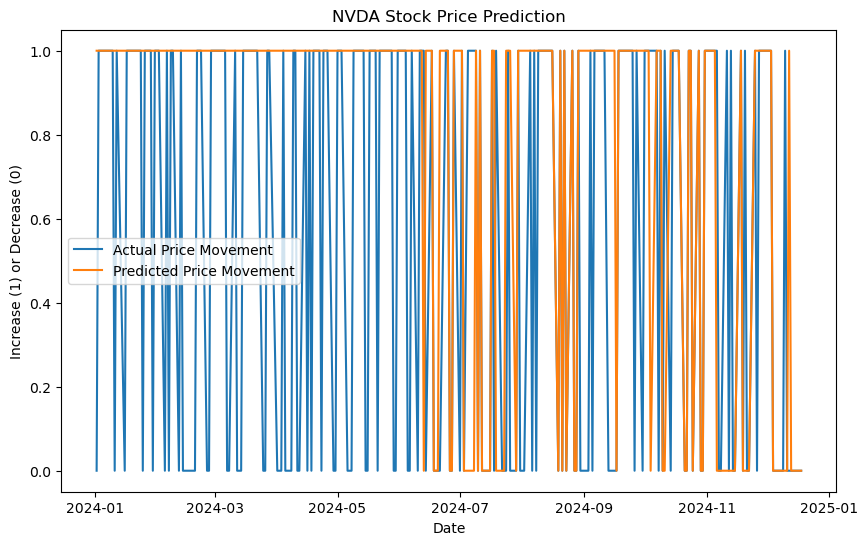

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(test['Target'], label='Actual Price Movement')
plt.plot(preds, label='Predicted Price Movement')
plt.title('NVDA Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Increase (1) or Decrease (0)')
plt.legend()
plt.show()